# Association Rules : Market Basket Analysis
You may often hear about how many businesses grow and progress quickly because of innovation, be it innovation on the product or business side.

One of the business innovations in retail is to find associations or relationships between products from sales transaction data that aims to:
<br>-bundled and sold together.
<br>-give someone a product recommendation.
<br>-putting together a display rack.
<br>-compiling e-commerce product pages.

All of this aims to increase sales while solving inventory problems - because products that don't sell well if paired correctly will be more attractive and will most likely be bought in one package. This process is an analysis process called Market Basket Analysis (MBA).

The application of Market Basket Analysis (MBA) in R can use a priori algorithm - which is one of the most popular algorithms in the machine learning area - in package arules. Arules itself stands for association rules - machine learning category.

### Apriori Algorithms and Association Rules
Talking about product packaging is actually looking for products that have strong relationships or associations in the transaction. The "strong" relationship here will be seen based on the proportion of the number of occurrences of the product combination to be bundled with the whole transaction.

And the algorithm that we can use is a priori algorithm which is an algorithm in the association rules category in the machine learning literature. This algorithm will produce combinations which are then arranged in the form of the rule "If you buy this ... then you will also buy ...".

There are quite a lot of applications of association rules, such as in the world of cyber security to detect network intrusion, in the field of sales marketing for product packaging, looking for web usage patterns, and others.

### Item, Itemset, and Rules
<pre>
    lhs                     rhs        support confidence lift    
[1] {Pet Food}           => {Sirup}    0.4     0.8000000  1.333333
[2] {Sirup}              => {Pet Food} 0.4     0.6666667  1.333333
[3] {Gula,Pet Food}      => {Sirup}    0.1     1.0000000  1.666667
[4] {Pet Food,Teh Celup} => {Sirup}    0.2     0.6666667  1.111111
</pre>

Item is a single product that is contained in a transaction.
<br> Example: Pet Food, Syrup, Sugar, and Tea Bags.

Itemset is a combination of one or more items contained in one transaction.
<br> Examples: {Pet Food}, {Sugar, Pet Food}, {Syrup}, etc.

Rule is a statement of the relationship between Itemset. Usually it can be formulated as "If buying itemset A, it will buy itemset B".
<br> Examples: {Pet Food} => {Syrup}, {Pet Food, Tea Bags} => {Syrup}, etc.

In [16]:
transaction.data <- read.csv("C:\\Users\\aftermath\\Documents\\CS-101\\R\\asset\\data_transaksi.txt", sep = "\t")
head(transaction.data,5)

Kode.Transaksi,Item
#01,Teh Celup
#01,Sirup
#01,Pet Food
#02,Teh Celup
#02,Gula


### Reading Files as Transactions
Code description:

File: Parameter location of files that can come from urls on the web or locally. In this example the data_transaksi.txt file is located on the academy.dqlab.id website.

https://academy.dqlab.id/dataset/data_transaksi.txt: location of the dataset contained on the DQLab web. If the location of the file and the R application are on your local computer, then replace it with the location of the file on local. For example c: \ data \ data_transaksi.txt

format: Format can be "single" or "basket".
<br>"single" means that each transaction item is written separately line by line, and this matches the format of our file.
<br>"basket" means all items per transaction are written per line.

sep: separator character or separator character between columns, for this file the separator character is tab or in notation in R written as "\ t".

cols: index of the columns used. For single format, the column must be two, the first column is transaction code while the second column shows transaction items. Writing c (1,2) in our example means the first and second columns we use.

skip: number of lines skipped before starting to read data. For our dataset, the first row is a header and is not needed, so we enter 1 as input.

In [18]:
library(arules)

transaksi <- read.transactions(file="C:\\Users\\aftermath\\Documents\\CS-101\\R\\asset\\data_transaksi.txt", 
    format="single", sep="\t", cols=c(1,2), skip=1)

inspect(transaksi)


     items                      transactionID
[1]  {Pet Food,Sirup,Teh Celup} #01          
[2]  {Gula,Teh Celup}           #02          
[3]  {Pet Food,Sirup}           #03          
[4]  {Sirup,Teh Celup}          #04          
[5]  {Gula,Sirup,Teh Celup}     #05          
[6]  {Pet Food,Teh Celup}       #06          
[7]  {Pet Food,Sirup,Teh Celup} #07          
[8]  {Teh Celup}                #08          
[9]  {Gula,Teh Celup}           #09          
[10] {Gula,Pet Food,Sirup}      #10          


Result description:

transactions in sparse format: This means transactions are in the form of sparse (spread). This might be clearer when it is visualized in the form of a matrix, we will practice this in the next several sections.

10 transactions (rows): our dataset has 10 transactions in total. There is information rows or lines here, this does not mean we have 10 data lines in our file. Because in reality, the file has 23 data lines.

4 items (columns): our dataset has a total of 4 unique items.

In [19]:
transaksi

transactions in sparse format with
 10 transactions (rows) and
 4 items (columns)

### Displays the Transaction Code List

In [21]:
transaksi@itemsetInfo

transactionID
#01
#02
#03
#04
#05
#06
#07
#08
#09
#10


### Displays a Transaction Item List

In [20]:
transaksi@itemInfo

labels
Gula
Pet Food
Sirup
Teh Celup


### Display Transactions in the form of Matrix
There are times when we want to see the distribution of items throughout our transactions. By using the output list in the form of text will feel very long. As one solution, we can display this distribution in the form of a two-dimensional matrix, where the rows are matrix order items and in columns are transaction items. For more details, let's just practice it.

The matrix of transaction objects can be seen from the data component using @ access, written in full as @data. Continuing the previous practice, the matrix object in our transaction variable is written as follows.

In [22]:
transaksi@data

4 x 10 sparse Matrix of class "ngCMatrix"
                        
[1,] . | . . | . . . | |
[2,] | . | . . | | . . |
[3,] | . | | | . | . . |
[4,] | | . | | | | | | .

The following is an explanation of the results:

4 x 10: meaning that there are 4 items and 10 transactions.

[1,] to [4,]: means the index representing each item in a transaction. This index actually reflects the order of results from 

the "Displaying Transaction Item List" section as follows:
<pre>
  labels
1 sugar
2 Pet Food
3 Syrup
4 Tea Bags
</pre>

thus, Sugar items are represented [1,], Pet Food is represented [2,], and so on.

Period symbol (.) indicates an item is not in the transaction.

Straight line symbol (|) indicates that the item is in a transaction.

### Item Frequency
items with the number of occurrences of all transactions are called item frequencies. 
This itemFrequency function is very important to help us analyze more complex transactions where the items involved are more numerous and the transactions that occur are greater than our current example.

In [23]:
itemFrequency(transaksi)

Gula  Pet Food     Sirup Teh Celup 
      0.4       0.5       0.6       0.8

These results indicate that the frequency of sugar emergence is 0.4 or 40 percent of the portion of all existing transactions, Pet Food occupies 50 percent, and so on.

In [24]:
itemFrequency(transaksi, type = "absolute")

Gula  Pet Food     Sirup Teh Celup 
        4         5         6         8

This means that Sugar has appeared 4 times from all available transactions, Pet Food appears 5 times, Syrup 6 times, and Teabag 8 times.


### Top-n Statistics
Simple statistics to answer questions like "Which n items have the most in all transactions?" It can't be done directly with one function in R, but it needs to combine several commands where one of them is sort function.

In [25]:
data_item <- itemFrequency(transaksi, type="absolute")

#Sort data_item
data_item <- sort(data_item, decreasing = TRUE)

#Top 3 item
data_item <- data_item[1:3]

#Convert to Data Frame format with 2 cols (Nama Produk and Jumlah)
data_item <- data.frame("Nama Produk" = names(data_item), "Jumlah" = data_item, row.names = NULL)

print(data_item)

  Nama.Produk Jumlah
1   Teh Celup      8
2       Sirup      6
3    Pet Food      5


### Item Frequency Chart
In addition to displaying transactions in the form of a matrix, we can also see the transaction distribution of each item in graphical form using the itemFrequencyPlot function.

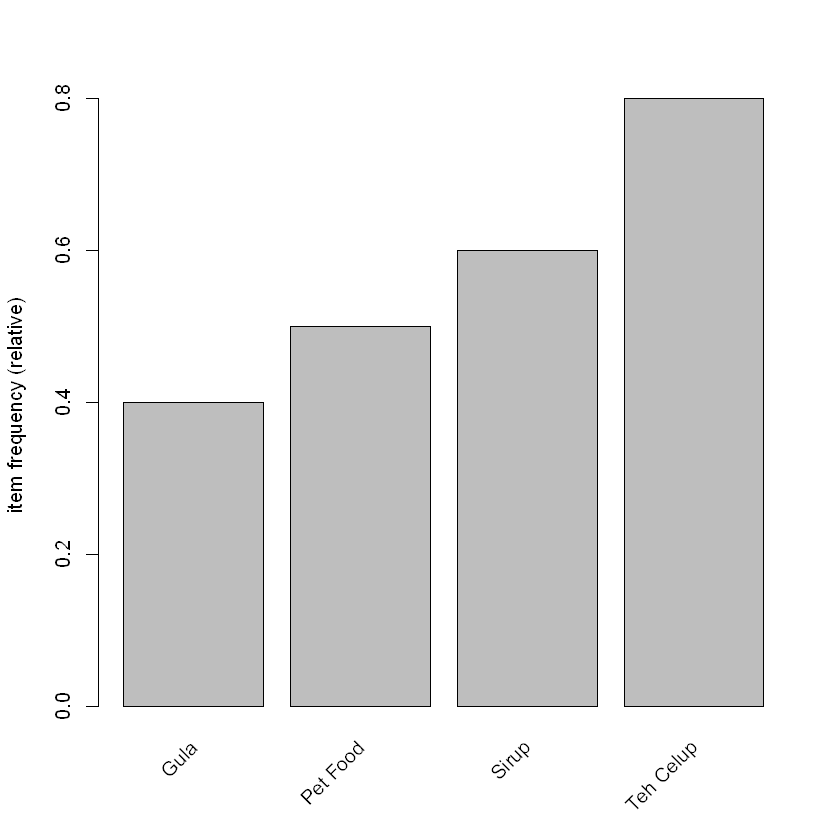

In [26]:
itemFrequencyPlot(transaksi)

### Generate Rules with Apriori
Rule is a formula that states a combination of two itemset. One itemset is on the left hand rule (left hand side) and one on the right hand (right hand side) in the following format.
<pre>
{itemset lhs} => {itemset rhs}

In [27]:
apriori(transaksi)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[4 item(s), 10 transaction(s)] done [0.00s].
sorting and recoding items ... [4 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [3 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 3 rules 

<hr>
look at the last line where it says "set of 3 rules". This means that with this a priori function, we get three rules. We will discuss more about these three rules in the next practice.

In [28]:
mba <- apriori(transaksi)
inspect(mba)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[4 item(s), 10 transaction(s)] done [0.00s].
sorting and recoding items ... [4 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [3 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
    lhs                rhs         support confidence lift     count
[1] {}              => {Teh Celup} 0.8     0.8        1.000000 8    
[2] {Pet Food}      => {Sirup}     0.4     0.8        1.333333 4    
[3] {Gula,Pet Food} => {Sirup}     0.1     1.0        1.666667 1    


<hr>
<pre>
lhs rhs support confidence lift
    lhs                rhs         support confidence lift     count
[1] {}              => {Teh Celup} 0.8     0.8        1.000000 8    
[2] {Pet Food}      => {Sirup}     0.4     0.8        1.333333 4    
[3] {Gula,Pet Food} => {Sirup}     0.1     1.0        1.666667 1    
</pre>

It can be seen that the mba variable stores three rules with the following columns:
<Br>-lhs: itemset on the left (left hand side)
<Br>-rhs: itemset on the right (right hand side)
<Br>-support, confidence and lift: metrics used to assess the quality of a rule. Generally, the bigger the better. Details of these metrics will be discussed in the next chapter.
    
If we focus on returning to the itemset of LHs and RHS for product packaging, the second rule is {Pet Food} => {Sirup} is quite interesting.

Why is that interesting?

Because support 0.4 shows that this combination is in 40 percent of the population - meaning 4 out of 10 transactions for our dataset. The lift value is also above 1, which means that this rule has a high association between the itemset contained in this rule.

Whereas {} => {Teabag} is not interesting because it only contains one item. The remaining rule, {Sugar, Food Map} => {Syrup} is too unique - this is indicated by the support 0.1 (10%) which means that it only exists in 1 in 10 transactions.

What is the meaning of rule if we want to apply it?

This means that there are several action item options that we can do:
<Br>-recommend to every customer who buys Pet Food to buy Syrup.
<Br>-Pet Food and Syrup display shelves can be brought closer.
<Br>-Pet Food and Syrup are bundled together and sold at special prices.

### RHS and LHS filter
From the results of inspecting the object of mba with the type of association rules in the previous practice, we now understand that the object contains a lot of information including the itemset contained in the left hand side and right hand side.

This is important for business, for example for inventory. We want to answer, is there an item that was unsold earlier in the itemset of the rules generated by a priori? If there is, maybe I can package it together so it is likely to sell more.

To do this we will filter or subsetting rules. Many ways, one of which is to use the combined function inspect, subset and operator% in% with the following format.

<pre>
inspect (subset (rules, rhs% in% text_or_vector_teks_that_represent_item))

In [29]:
inspect(subset(mba, rhs %in% "Sirup"))

    lhs                rhs     support confidence lift     count
[1] {Pet Food}      => {Sirup} 0.4     0.8        1.333333 4    
[2] {Gula,Pet Food} => {Sirup} 0.1     1.0        1.666667 1    


In [30]:
inspect(subset(mba, lhs %in% "Gula"))


    lhs                rhs     support confidence lift     count
[1] {Gula,Pet Food} => {Sirup} 0.1     1          1.666667 1    


In [31]:
inspect(subset(mba, lhs %in% "Pet Food" & rhs %in% "Sirup"))

    lhs                rhs     support confidence lift     count
[1] {Pet Food}      => {Sirup} 0.4     0.8        1.333333 4    
[2] {Gula,Pet Food} => {Sirup} 0.1     1.0        1.666667 1    


### Generate Rules with Support and Confidence Parameters

In [33]:
mba <- apriori(transaksi,parameter = list(supp = 0.1, confidence = 0.5))
inspect(mba)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[4 item(s), 10 transaction(s)] done [0.00s].
sorting and recoding items ... [4 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [16 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
     lhs                     rhs         support confidence lift      count
[1]  {}                   => {Pet Food}  0.5     0.5000000  1.0000000 5    
[2]  {}                   => {Sirup}     0.6     0.6000000  1.0000000 6    
[3]  {}                   => {Teh Celup} 0.8     0.8000000  1.000

### Filter based on Lift


In [34]:
inspect(subset(mba, (lhs %in% "Teh Celup" | rhs %in% "Teh Celup") & lift >1))

    lhs                     rhs     support confidence lift     count
[1] {Pet Food,Teh Celup} => {Sirup} 0.2     0.6666667  1.111111 2    


### Recommendation Filter with% ain%
The% in% operator that we previously used was effective. But this operator is not suitable if we want to filter itemset with AND logic. This means that all items must appear in the selected itemset. For this purpose, use the% ain% operator.

In [35]:
inspect(subset(mba, (lhs %ain% c("Pet Food", "Gula"))))

    lhs                rhs     support confidence lift     count
[1] {Gula,Pet Food} => {Sirup} 0.1     1          1.666667 1    


### Visualization of Rules with Graphs
when more and more items, then the process of choosing based on numbers alone is quite troublesome. Sometimes visualization can be very helpful for this analysis.

There are quite a lot of types of visualizations, but we will use the graph type visualizations contained in the arulesViz package - a package with special visualizations for association rules.

Warning message:
"package 'arulesViz' was built under R version 3.6.2"Loading required package: grid
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'seriation':
  method         from 
  reorder.hclust gclus


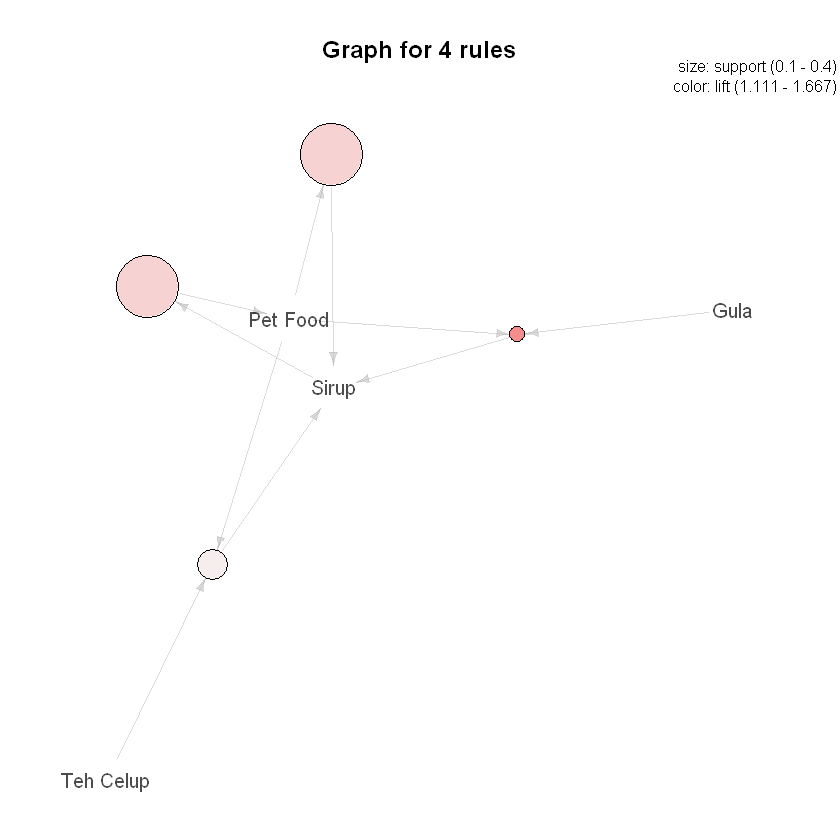

In [40]:
library("arulesViz")

plot(subset(mba, lift>1.1), method="graph")

The circle here is the meeting point (association) of existing items, where there is an arrow as the connecting line. Each item here is text.

The size of the circle shows the popularity, and the color intensity shows the elevator. Seen here, Sugar to Syrup, and Pet Food to Syrup have relatively high elevations, but the support is not too large.